Importing Common Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Dictionary

* hotel: Type of hotel(Resort hotel or City Hotel)

* is_canceled: Value indicating if the booking was canceled (1) or not (0)

* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* arrival_date_year: Year of arrival date

* arrival_date_month: Month of arrival date

* arrival_date_week_number: Week number of year for arrival date

* arrival_date_day_of_month: Day of arrival date

* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* adults: Number of adults

* children: Number of children

* babies: Number of babies

* meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format

* market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)

* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

* agent: ID of the travel agency that made the booking

* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer

* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* required_car_parking_spaces: Number of car parking spaces required by the customer

* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

* reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

* reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

# Data reading and basic eyeballing

In [2]:
# reading the data and first five rows
data=pd.read_csv('hotel.csv')
df=data.copy()
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Summary statistics
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# Corelation matrix
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


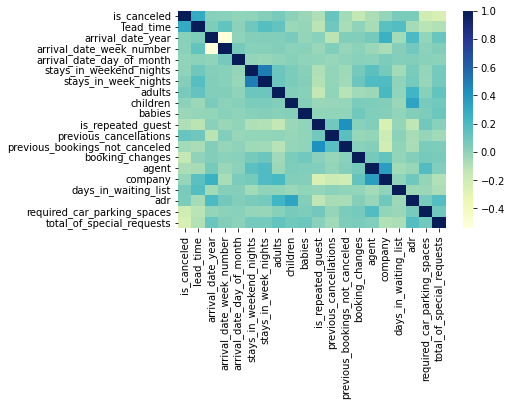

In [6]:
# heatmap for the corelation matrix
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

In [7]:
# Checking for missing values
df.isnull().sum()[df.isnull().sum()>0]
# Data has missing values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [8]:
# Checking for class imbalance in the target variable
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

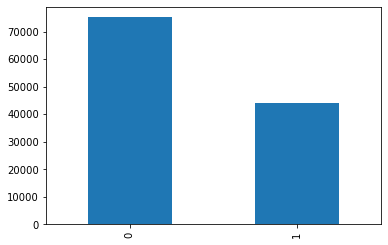

In [9]:
df.is_canceled.value_counts().plot.bar()
plt.show()
# The data imbalance seems to minimum
# For now we don't seem to be needing balancing the target variable

# Data cleaning and Handling of missing Values

In [10]:
df.isnull().sum()[df.isnull().sum()>0]
#Cheking columnsb which have missing values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [11]:
# Now we will fill the agent column
# We see that other than the missing values we have agent ids
# We will fill the missing values with 'No Agent' and the agent ids with 'Agent' 

In [12]:
# First we will fill the agent ids with 'Agent'
df.loc[df.agent.isnull()==False,'agent']='Agent'

In [13]:
# Now we will fill the null values with 'No agent'
df.agent.fillna('No agent',inplace=True)

In [14]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
company     112593
dtype: int64

In [15]:
# We would fill the missing values in the country coulumns with 'Unknown' since we do not seem to find any references to other columns
df.country.fillna('Unknown',inplace=True)

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
company     112593
dtype: int64

In [17]:
# We would fill the missing values in the children column with 0
df.children.fillna(0,inplace=True)

In [18]:
df.isnull().sum()[df.isnull().sum()>0]

company    112593
dtype: int64

In [19]:
# We see that in some rows market segment or distribution channel is given as corporate where the company row is null
# We will fill these null values with 'Company'
df.loc[((df.market_segment=='Corporate') | (df.distribution_channel=='Corporate')) & (df.company.isnull()),'company']='Corporate'

In [20]:
# Now we will fill the non missing values in company column with corporate as well
df.loc[df.company.isnull()==False,'company']='Corporate'

In [21]:
# Now we will fill the remaining missing values in the company column with 'Individuals'
df.company.fillna('Individuals',inplace=True)

In [22]:
df.isnull().sum()
# The data has no missing values now

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [23]:
# Deduplicating the rows
df=df.drop_duplicates(keep='first').reset_index().drop(columns='index')

In [24]:
# Before doing our univariate analysis we would change the datatypes of columns to their correct datatype
df.arrival_date_year=df.arrival_date_year.astype(object)

In [25]:
# Also there are a lot of unique values in the country column
# so we would bin this column
df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [26]:
# We would bin the country column in its respective continents
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [27]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
df.country=df.country.apply(country_bin) #Binning the country column

In [28]:
df.country.unique()

array(['Europe', 'North America', 'Unknown', 'Asia', 'South America',
       'Australia', 'Africa', 'Others'], dtype=object)

### Reservation status is basically a column which will be filled after the event is occuring. So from a business perspective to need to be able to predict before the the confirmation from the customer. This column is going to be filled only filled when the confirmation from the customer is already given. So we need to exclude this column when model building

# Exploratory Data Analysis

## Column: Hotel

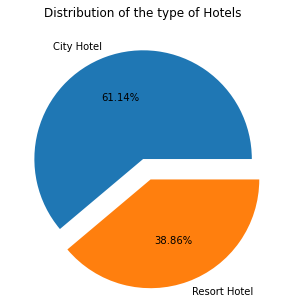

In [29]:
# column: hotel
# df.hotel.value_counts().plot.pie(autopct='%.2f%%',)
plt.rcParams['figure.figsize']=[5,5]
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')
plt.title('Distribution of the type of Hotels')
plt.show()

### There are more booking in city hotel compared to resort hotel. 

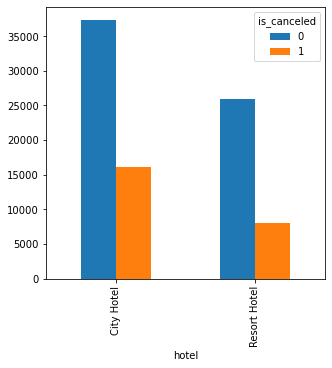

In [30]:
pd.crosstab(df.hotel,df.is_canceled).plot.bar()
plt.show()

#### We see that there are more cancellations in city hotels. But this could be because there are more records regarding city hotels. We would need to see the percentage of the records accordingly.

In [31]:
tbl=pd.crosstab(df.hotel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
hotel,,,
City Hotel,37373,16047,53420
Resort Hotel,25985,7974,33959
All,63358,24021,87379


In [32]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

In [33]:
tbl

is_canceled,0,1,All,cancel_percent
hotel,,,,
City Hotel,37373,16047,53420,30.039311
Resort Hotel,25985,7974,33959,23.481257
All,63358,24021,87379,27.490587


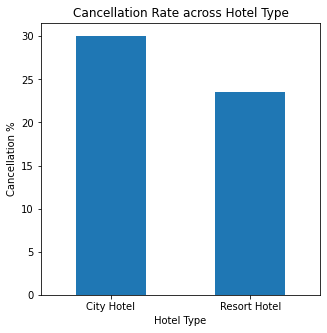

In [34]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Cancellation Rate across Hotel Type')
plt.xlabel('Hotel Type')
plt.xticks(rotation=0)
plt.ylabel('Cancellation %')
plt.show()

#### We see that the percentage of cancellations is higher comparitively to resort hotel. Also since we have higher number of records in city hotel, this may imply that there could be overbooking occuring in city hotel. 

## Column: Lead time

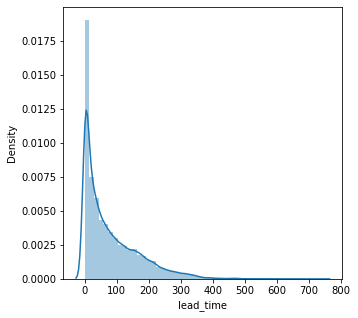

In [35]:
sns.distplot(df.lead_time)
plt.show()

#### We see that most of the records are between 0 and 200. Higher lead time could indicate that some records are booked for occasions and preplanned events.

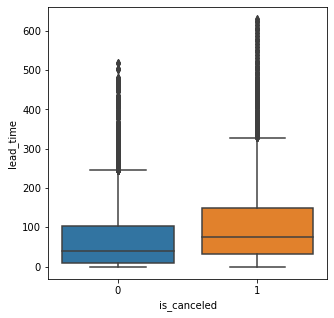

In [36]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='City Hotel'])
plt.show()

#### From the above boxplot we can infer that cancelled bookings in city hotels have a higher lead time. This again indicates the presence of overbooking in the city hotels

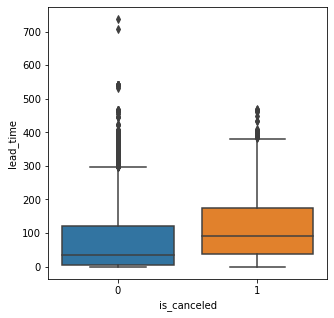

In [37]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='Resort Hotel'])
plt.show()

#### From the above boxplots we infer that checked out bookings have a higher max lead time in resort hotels. But on average canceled bookings seem to be having higher lead time in resort hotels.

## Column: arrival date year

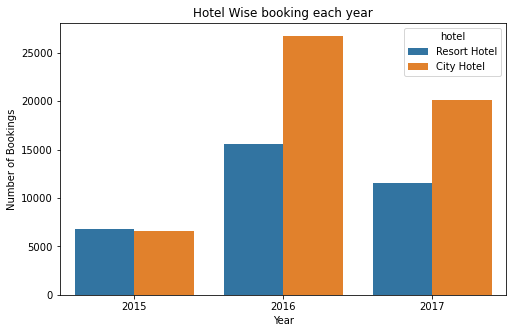

In [38]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=df,hue='hotel')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.title('Hotel Wise booking each year')
plt.show()

#### From the above barplots we see that 2016 had the highest number of bookings. While 2015 had the least. This could imply that these hotels could newer and established around 2015.

In [39]:
# We will now check year wise cancellation rate
tbl=pd.crosstab(df.arrival_date_year,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
arrival_date_year,,,
2015,10605,2702,13307
2016,31178,11207,42385
2017,21575,10112,31687
All,63358,24021,87379


In [40]:
tbl['cancel-percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel-percent
arrival_date_year,,,,
2015,10605,2702,13307,20.305103
2016,31178,11207,42385,26.440958
2017,21575,10112,31687,31.912141
All,63358,24021,87379,27.490587


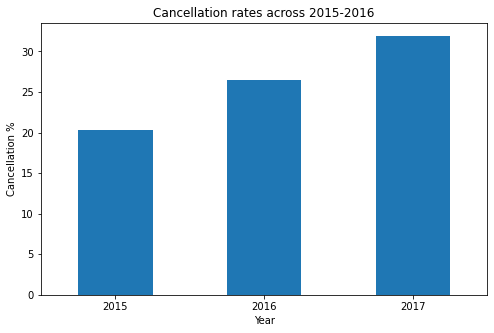

In [41]:
tbl.drop('All',axis=0)['cancel-percent'].plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Cancellation %')
plt.title('Cancellation rates across 2015-2016')
plt.show()

In [42]:
df[df.is_canceled==1]['arrival_date_year'].value_counts()/len(df[df.is_canceled==1])

2016    0.466550
2017    0.420965
2015    0.112485
Name: arrival_date_year, dtype: float64

#### We see that 2017 had the highest cancellation percentage compared to 2015 and 2016. This may be due to some issues with the hotels in 2016, possibly overbooking and customer dissatisfaction. This could also be because of a bit of degraded customer support on the part of the hotels. Also we see that the cancel percentage increases with each passing year. This again could be indication of an overbooking problem

## Column: arrival date month

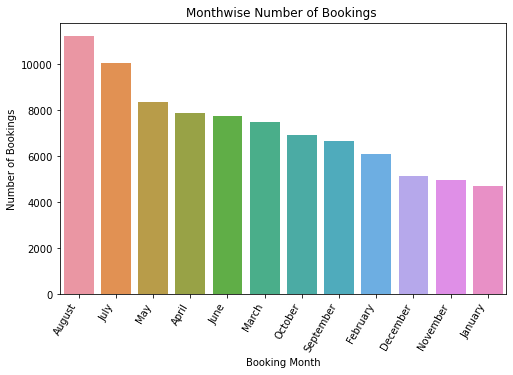

In [43]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index)
plt.title('Monthwise Number of Bookings ')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()

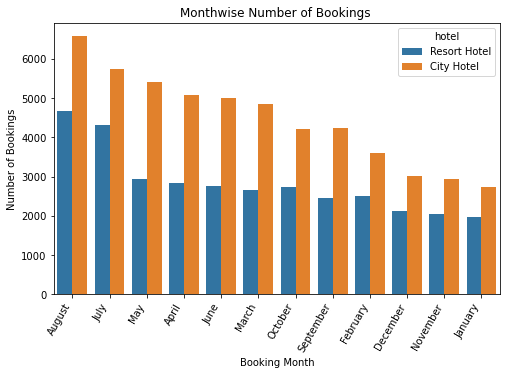

In [44]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index,hue='hotel')
plt.title('Monthwise Number of Bookings ')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that August and July have the highest number of bookings compared to any other month. There could be some kind of festival or carnivals that are a major tourist attraction during these months. This could also be because of school vacations during August and July. This could also mean more crowds and festivities in this month.

In [45]:
tbl=pd.crosstab(df.arrival_date_month,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
arrival_date_month,,,
April,5498,2409,7907
August,7633,3621,11254
December,3751,1378,5129
February,4682,1415,6097
January,3654,1038,4692
July,6858,3198,10056
June,5411,2353,7764
March,5681,1830,7511
May,5912,2442,8354


In [46]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

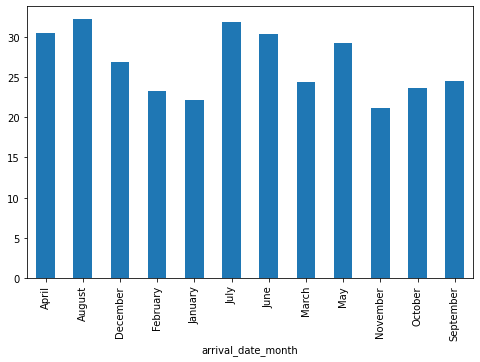

In [47]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that August has the highest cancellation percentage compared to any other month. This again indicates towards overbooking and rushed bookings during fesitivites times and vacations.

## Column: arrival date week number

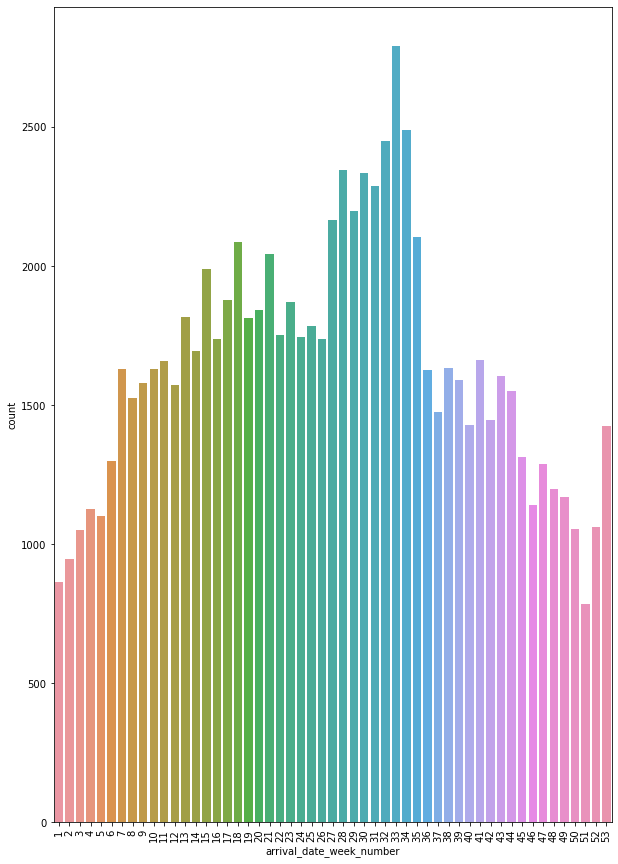

In [48]:
plt.figure(figsize=(10,15))
sns.countplot(x='arrival_date_week_number',data=df)
plt.xticks(rotation='vertical')
plt.show()

#### We see that week number 33 has the highest number of bookings compared to any other week. This week lies around the time of august which further supports the idea that we have festivities and vacations during the month of August. Also we see that there are considerably less number of bookings towards the end of the year, especially during week 51 which usually falls in December during the time of Christmas.

## Column: stays in weekend nights

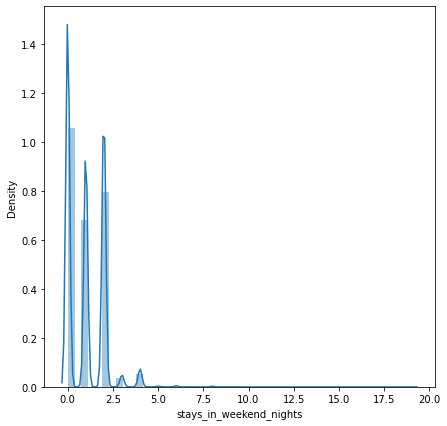

In [49]:
plt.figure(figsize=(7,7))
sns.distplot(df.stays_in_weekend_nights)
plt.show()

#### Most people stay for shorter stays in the hotels with the usual number being between 0 and 5. This means a month long vacation could be the most popular vacation and trip type in these hotels. There are records with longer stays. This could be about people visiting on longer project and work related corporate trips which extend to many months.

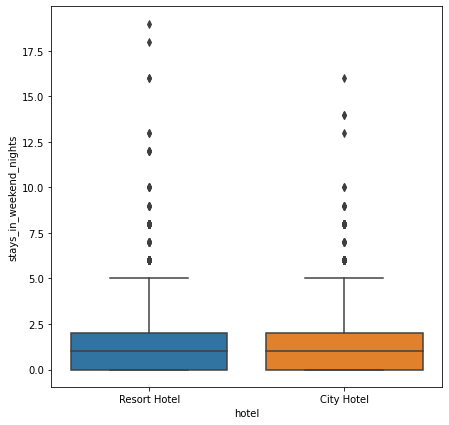

In [50]:
plt.figure(figsize=(7,7))
sns.boxplot(x='hotel',y='stays_in_weekend_nights',data=df)
plt.show()

#### We see that resort hotel usually has a higher stays in weekend nights compared to city hotel. Since resort hotels are usuaaly located near tourist attractions, beaches and forests, this could mean that work related trips could be for environmental studies or historical studies. 

#### We see that along with stays in weekend nights, stays in week nights has a similar pattern as well

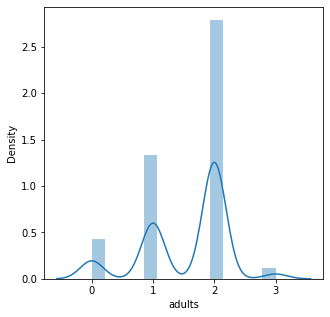

In [51]:
plt.figure(figsize=(5,5))
sns.distplot(df.loc[(df.stays_in_week_nights==0) & (df.stays_in_weekend_nights==0)]['adults'])
plt.show()

## We observed that there are records containing 0 weekend stays, and 0 week nights stays and see that the number of adults in these is usually in small numbers. This could be couples,solo short trips. Records with 2 number of adults could indicate wedding aniversaries, birthdays. In these cases couples could be enjoying a casual stay in the hotels for a few hours for celebrations 

## Column: Babies

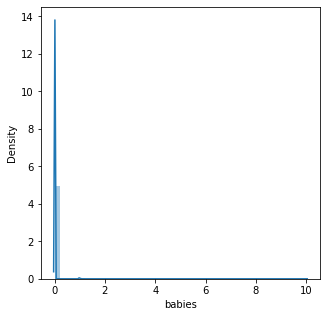

In [52]:
plt.figure(figsize=(5,5))
sns.distplot(df.babies)
plt.show()

#### We see that maximum records have 0 children. This indicates tha maximum trips are corporate, solo, couple and casual trips. There some records with higher number of babies which could mean presence of joint families on family trips.

#### We also see a similar pattern with the number of children column as well

## Column: meal

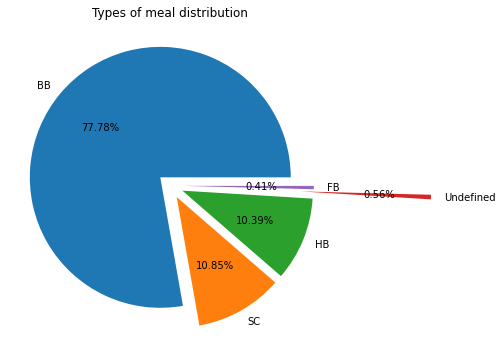

In [53]:
plt.figure(figsize=(8,6))
plt.pie(df.meal.value_counts().values,explode=[0.1,0.1,0.1,1,0.1],labels=df.meal.value_counts().index,autopct='%.2f%%')
plt.title('Types of meal distribution')
plt.show()

#### We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well. This further indicates the presence of popular restaurents around the hotels.

## Column: country

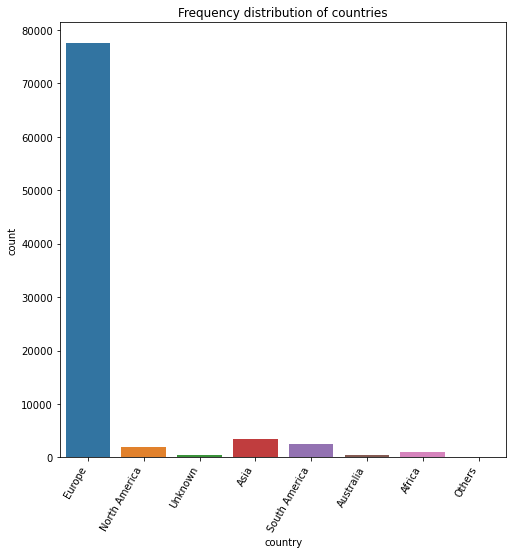

In [54]:
plt.figure(figsize=(8,8))
sns.countplot(x='country',data=df)
plt.title('Frequency distribution of countries')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that most people booking for reservations are European. This could be because of the hotels being in Portugal and Portugal being a part of the European Union, which makes for easier travel for vacationers and travellers across the countries in European Union.

In [55]:
tbl=pd.crosstab(df.country,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
country,,,
Africa,559,436,995
Asia,2286,1141,3427
Australia,286,92,378
Europe,56573,20944,77517
North America,1531,474,2005
Others,106,53,159
South America,1599,847,2446
Unknown,418,34,452
All,63358,24021,87379


In [56]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
country,,,,
Africa,559,436,995,43.819095
Asia,2286,1141,3427,33.294427
Australia,286,92,378,24.338624
Europe,56573,20944,77517,27.018589
North America,1531,474,2005,23.640898
Others,106,53,159,33.333333
South America,1599,847,2446,34.627964
Unknown,418,34,452,7.522124
All,63358,24021,87379,27.490587


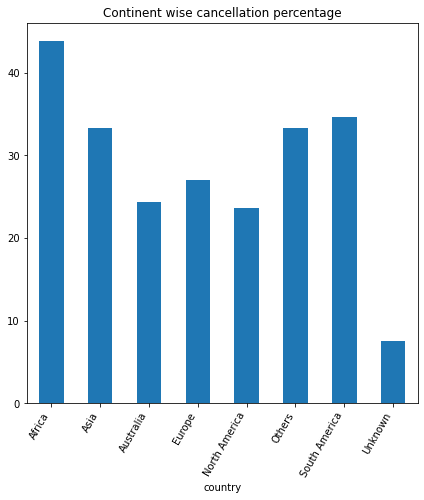

In [57]:
plt.figure(figsize=(7,7))
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Continent wise cancellation percentage')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that Africa has the highest rate of cancellation. Issues could be originating from issues with Visas(a hotel booking is mandatory for applying for a Portuguese entry visa) because some strict rules in the European Union(cancellation percentage in considerably less amongst European countries). Amongst the known continents, customers from North America seems to be having the least percentage of cancellation.

## Column: Market segment

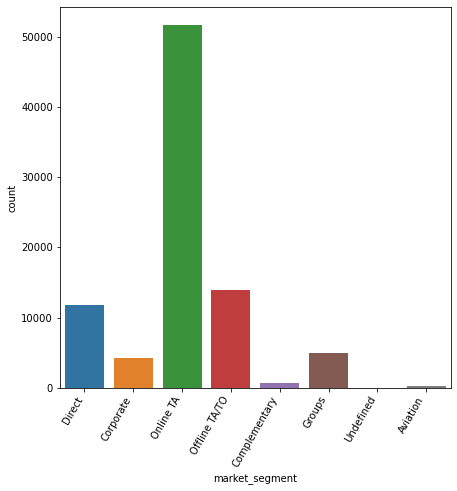

In [58]:
plt.rcParams['figure.figsize']=[7,7]
sns.countplot(x='market_segment',data=df)
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that most of the records are through Online Travel Agents indicating a strong presence of online travel agents with a strong network in Portugal. There are also records with market_segment as Aviation. These records could be of different flight crews and their stays in these hotels. There are some complementary segments as well. It could indicate a few cases of complaints from the end of customers. This could also indicate a policy of reimbursment or compensation on the part of the hotels.

In [59]:
tbl=pd.crosstab(df.market_segment,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
market_segment,,,
Aviation,182,45,227
Complementary,614,88,702
Corporate,3698,510,4208
Direct,10067,1737,11804
Groups,3606,1335,4941
Offline TA/TO,11822,2060,13882
Online TA,33369,18244,51613
Undefined,0,2,2
All,63358,24021,87379


In [60]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
market_segment,,,,
Aviation,182,45,227,19.823789
Complementary,614,88,702,12.535613
Corporate,3698,510,4208,12.119772
Direct,10067,1737,11804,14.715351
Groups,3606,1335,4941,27.018822
Offline TA/TO,11822,2060,13882,14.839360
Online TA,33369,18244,51613,35.347684
Undefined,0,2,2,100.000000
All,63358,24021,87379,27.490587


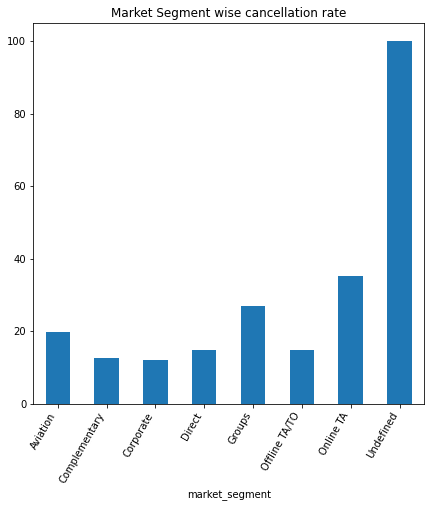

In [61]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Market Segment wise cancellation rate')
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that undefined market segment has the highest cancellation rate. But there are only two records where market segment was undefined. Among the other market segments, cancellation rates were highest in the online TA segments.

## Column: Distribution channel

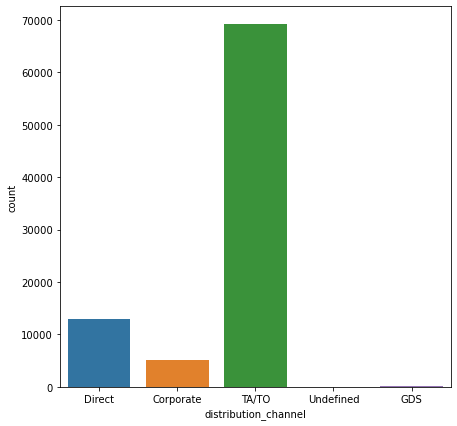

In [62]:
sns.countplot(x='distribution_channel',data=df)
plt.show()

#### We see that that among all distribution channels Travel Agents and Tour Agents have the highest number of bookings. This could indicate tie ups of the hotels and tour operators and travel agents.

In [63]:
tbl=pd.crosstab(df.distribution_channel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
distribution_channel,,,
Corporate,4429,648,5077
Direct,11063,1925,12988
GDS,145,36,181
TA/TO,47720,21408,69128
Undefined,1,4,5
All,63358,24021,87379


In [64]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
distribution_channel,,,,
Corporate,4429,648,5077,12.763443
Direct,11063,1925,12988,14.821374
GDS,145,36,181,19.889503
TA/TO,47720,21408,69128,30.968638
Undefined,1,4,5,80.000000
All,63358,24021,87379,27.490587


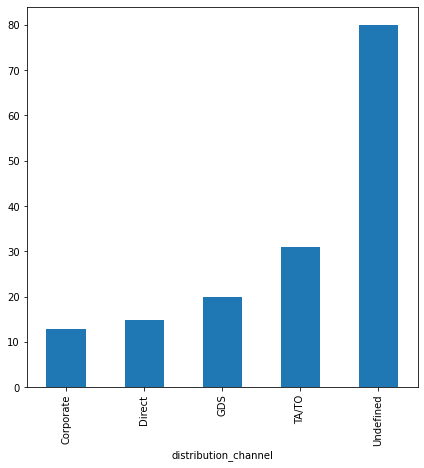

In [65]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that undefined distribution channel has the highest cancellation percentage. But there are only 5 records of undefined distribution channel. Among the defined distribution channels Travel agents and tour operators seem to have the highest cancellation rates. Corporate bookings have the least cancellation rates among all the distribution channels.

## Column: is_repeated_guest

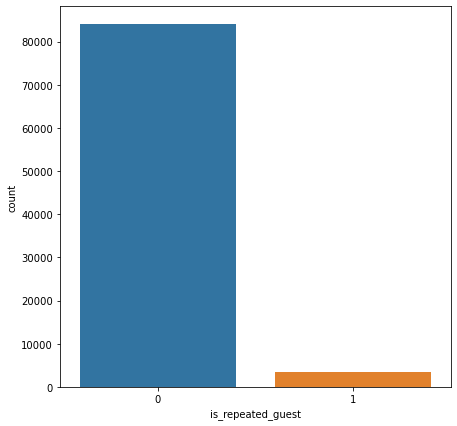

In [66]:
sns.countplot(x='is_repeated_guest',data=df)
plt.show()

#### We see that very few records are of customers that are repeated guests.

In [67]:
tbl=pd.crosstab(df.is_repeated_guest,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
is_repeated_guest,,,
0,60204,23760,83964
1,3154,261,3415
All,63358,24021,87379


In [68]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
is_repeated_guest,,,,
0,60204,23760,83964,28.297842
1,3154,261,3415,7.642753
All,63358,24021,87379,27.490587


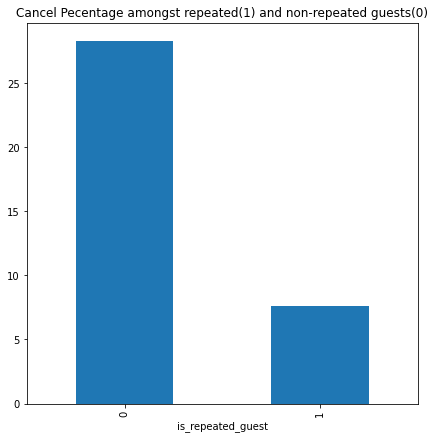

In [69]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Cancel Pecentage amongst repeated(1) and non-repeated guests(0)')
plt.show()

#### We see that non repeated guests have a higher rate of cancellation compared to repeated guests.

## Column: previous_cancellations

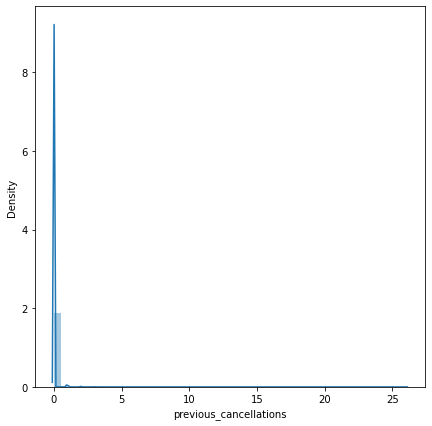

In [70]:
sns.distplot(df.previous_cancellations)
plt.show()

#### We see that most of the customers do not have any previous cancellations. This could also be because most of the customers are non-repeated guests. We also observe records where with a higher number of previous cancellations.

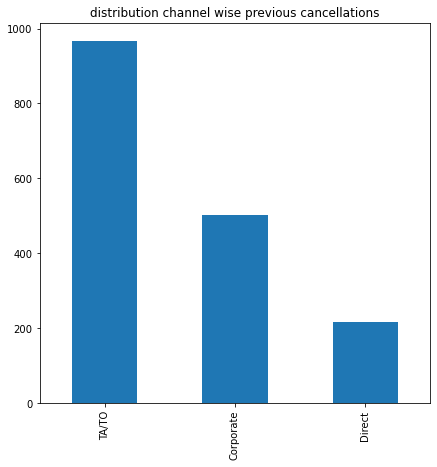

In [71]:
df.loc[df.previous_cancellations>0]['distribution_channel'].value_counts().plot.bar()
plt.title('distribution channel wise previous cancellations')
plt.show()

#### We see that the highest number of previous cancellations are from travel agents and tour operators. This indicates that travel agents and tour operators have a habit of bulk booking and reserving the rooms before approaching travellers.

## Column: previous_bookings_not_cancelled

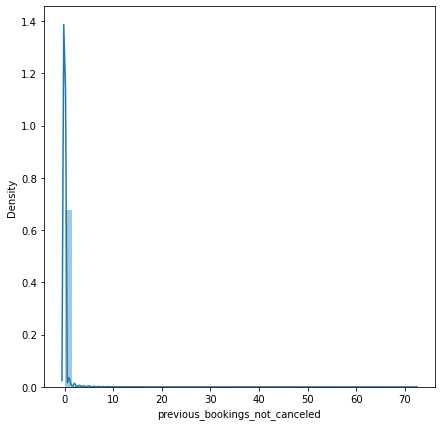

In [72]:
sns.distplot(df.previous_bookings_not_canceled)
plt.show()

#### From the above density plot we see that most of the bookings are of customers with 0 previous cancellations. There records indicating higher numbers. We would explore them further

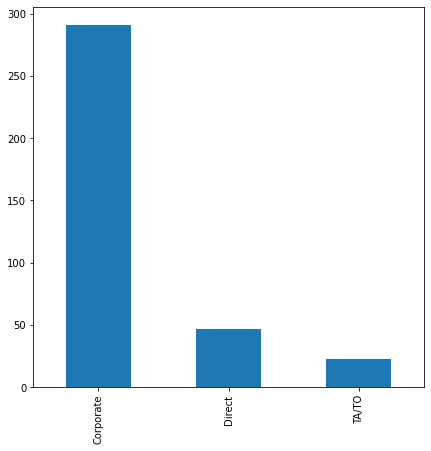

In [73]:
df.loc[df.previous_bookings_not_canceled>10]['distribution_channel'].value_counts().plot.bar()
plt.show()

#### We see that amongst the booking with higher number non-cancelled previous bookings most of them are from the corporate sector. It seems that the hotel reserves bookings under the corporate name but considers the individuals representing these corporates as seperate guests when considering they are repeated guests or not. Hence we see some corporate records with non-repeated guests but a a large number of non-cancelled previous bookings

## Column: Reserved room type

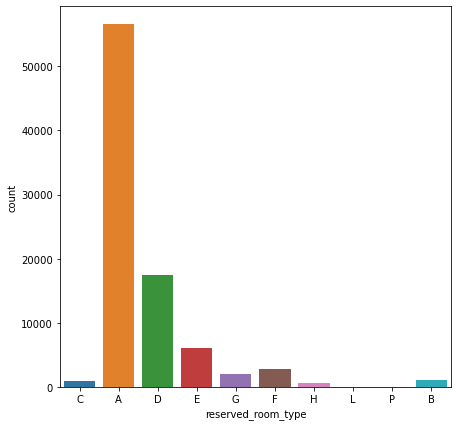

In [74]:
sns.countplot(x='reserved_room_type',data=df)
plt.show()

#### We see that hotel room of type A seems to be the most commonly booked room type. This room could be the most economical room type available at the hotels. We also see that there are very few records of room type L and P. These rooms could be luxury rooms and luxury suites.

In [75]:
tbl=pd.crosstab(df.reserved_room_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
reserved_room_type,,,
A,41852,14684,56536
B,681,318,999
C,619,296,915
D,12162,5236,17398
E,4400,1648,6048
F,1972,851,2823
G,1315,737,2052
H,353,243,596
L,4,2,6


In [76]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

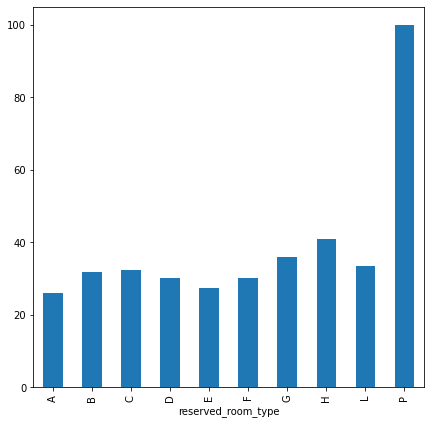

In [77]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

#### We see that room type P has the highest cancellation rate. But P and L have 12 records together. Among Others H seems to be having the highest cancellation percentage. We also draw a similar inference from assigned room type

In [78]:
# Number of records where assigned room type was not same as reserved room type
df.loc[df.reserved_room_type!=df.assigned_room_type].shape

(13106, 32)

#### We see that there are 13,106 bookings where the customers were not able to get their reserved room type This indicates the presence of overbooking in the case of these hotels

## Column: Booking changes

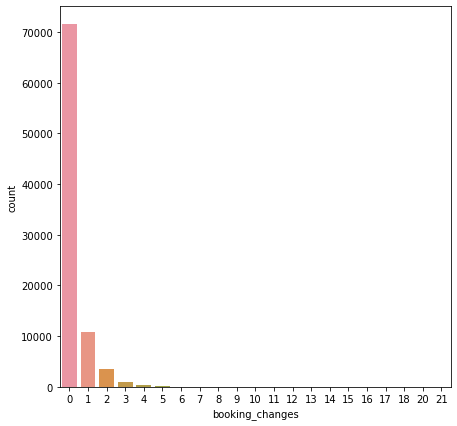

In [79]:
sns.countplot(x='booking_changes',data=df)
plt.show()

#### We see that most records do not make any kind of booking changes to their reservations. There are records with a high number of booking changes.

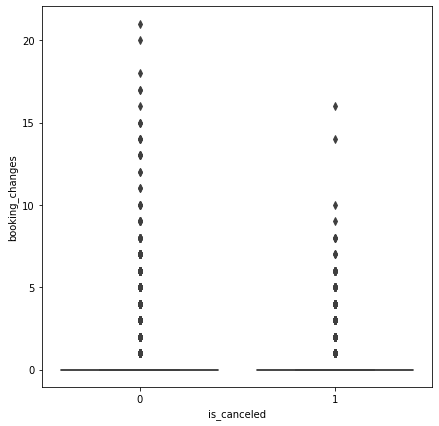

In [80]:
sns.boxplot(x='is_canceled',y='booking_changes',data=df)
plt.show()

#### We see that non-cancelled booking have a higher number of booking changes

## Column: Deposit Type

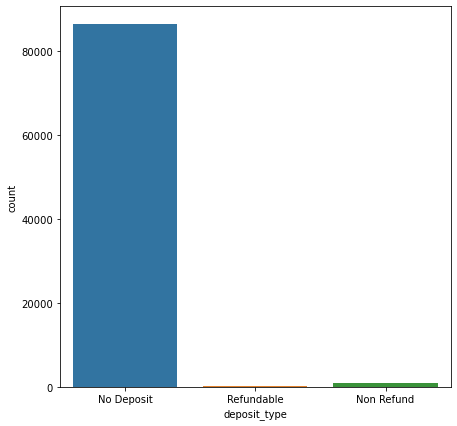

In [81]:
sns.countplot(x='deposit_type',data=df)
plt.show()

#### We see that most of the bookings have been made with no deposits, with very few bookings made refundable and non-refundable

In [82]:
tbl=pd.crosstab(df.deposit_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
deposit_type,,,
No Deposit,63222,23012,86234
Non Refund,55,983,1038
Refundable,81,26,107
All,63358,24021,87379


In [83]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

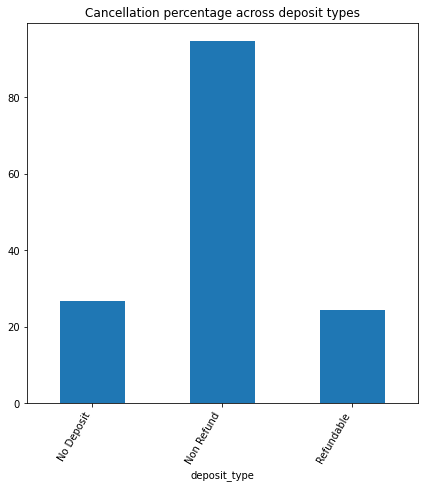

In [84]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.title('Cancellation percentage across deposit types')
plt.show()

#### From the above analysis of the column we infer that, absurdly there is a huge percentage of cancellations in bookings done on non-refundable deposit types. To investigate, we read the paper 'Big Data in Hotel Revenue Management: Exploring Cancellation Drivers to Gain Insights Into Booking Cancellation Behavior.' We found out that when analysing the deposit type columns with the country of origins, a trend could be found. Most of these records of Asiatic and African countries where Non-refundable deposit type was mentioned happened to be done through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa). To quote from the paper itself: "As an example, through analysis of the “Nonrefundable” (DepositType) canceled bookings in some Asiatic countries (Country) and from certain distribution channels (DistributionChannel and Agent), it is possible to understand why so many “Nonrefundable” bookings are canceled. These bookings are usually made through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa).After failing to charge the customer’s credit card, the hotel identifies these bookings as “fake” and contacts the customer; however, during the time required to verify these bookings, they contribute negatively to demand forecast and demand-management decisions."  

## Column: Agent

In [85]:
df.agent.value_counts()

Agent       75190
No agent    12189
Name: agent, dtype: int64

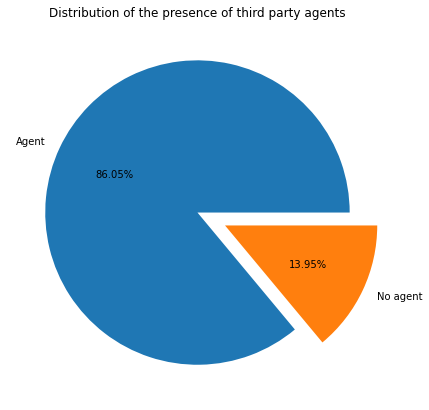

In [86]:
plt.pie(x=df.agent.value_counts().values,labels=df.agent.value_counts().index,explode=[0,0.2],autopct='%.2f%%')
plt.title('Distribution of the presence of third party agents')
plt.show()

#### We see that 86% bookings were done through third party agents while only 13% bookings were done through other sources. This is quite obvious with the strong presence of tour operators and travel agents, indicated by the distribution of market_segment and distribution channel columns

In [87]:
tbl=pd.crosstab(df.agent,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
agent,,,
Agent,52726,22464,75190
No agent,10632,1557,12189
All,63358,24021,87379


In [88]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
agent,,,,
Agent,52726,22464,75190,29.876313
No agent,10632,1557,12189,12.773812
All,63358,24021,87379,27.490587


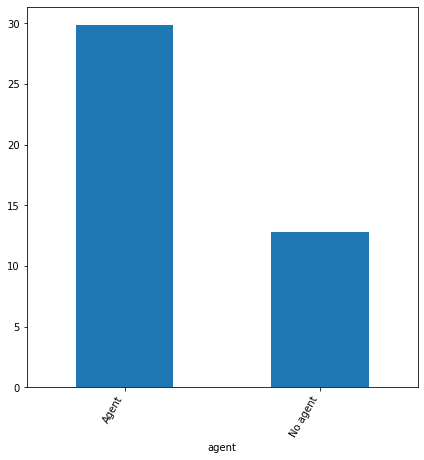

In [89]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that the cancellation percentage is considerable higher in bookings made through third party agents compared to direct bookings

## Column: Company

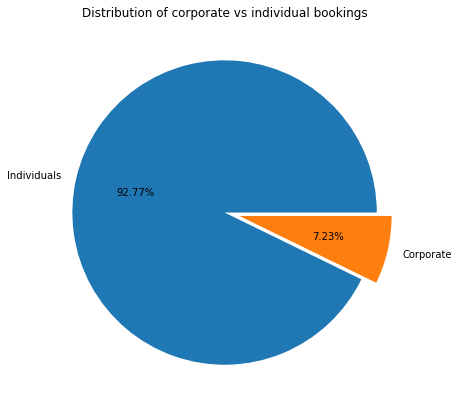

In [90]:
plt.pie(x=df.company.value_counts().values,labels=df.company.value_counts().index,explode=[0,0.1],autopct='%.2f%%')
plt.title('Distribution of corporate vs individual bookings')
plt.show()

#### We see that 92% of the bookings are done by individuals compared 7% by corporates. But this contradicts the strong presence of the Corporate sector in distribution and market segment area. One reason for this could be that most of the bookings were done on corporate benefits by employees and the reservation was done in the name of the company.

In [91]:
tbl=pd.crosstab(df.company,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
company,,,
Corporate,5555,763,6318
Individuals,57803,23258,81061
All,63358,24021,87379


In [92]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

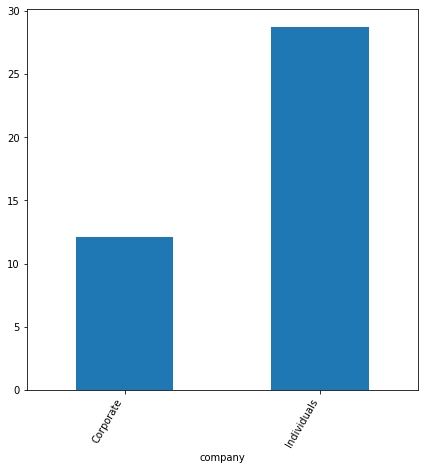

In [93]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

#### We see that only around 12% of corporate bookings are cancelled compared to around 29% in individuals

## Column: customer_type

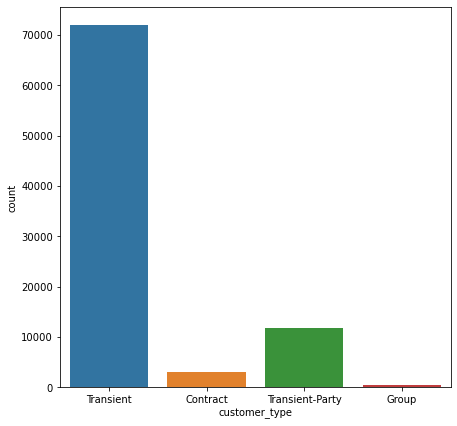

In [94]:
sns.countplot(x='customer_type',data=df)
plt.show()

#### We see that most number of bookings are from transient customers, meaning they are staying for less than 30 consecutive days.

## Column: adr(Average Daily Rate)

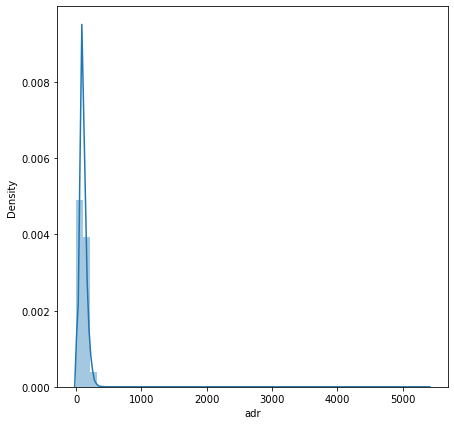

In [95]:
sns.distplot(df.adr)
plt.show()

#### We notice that most records have low adr, going upto a few hundreds. There is only one record with adr above 1000, which was a non-refund deposit type and a cancelled booking. This could be the deposit money counted into in adr

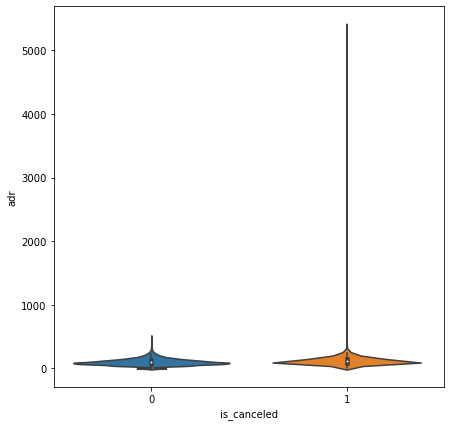

In [96]:
sns.violinplot(x='is_canceled',y='adr',data=df)
plt.show()

#### We notice that there are similar trends in cancelled and non-cancelled bookings, with the max adr being registered in cancelled bookings

## Column: required Car parking spaces

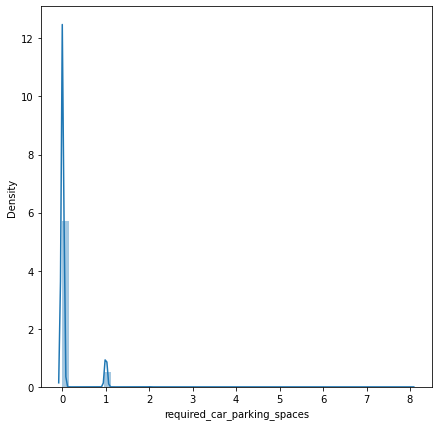

In [97]:
sns.distplot(df.required_car_parking_spaces)
plt.show()

#### We notice that most of the records require no or atmost 1 car parking spaces, though there are records that show more number of parking spaces. This could be families travelling together and larger business trips.

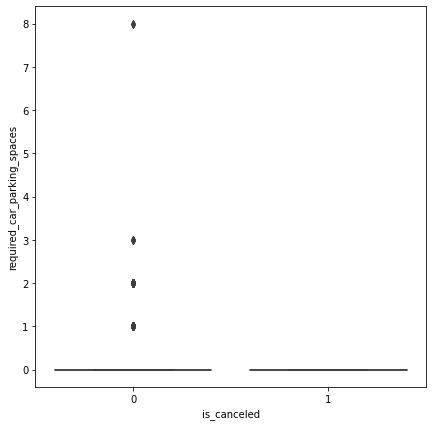

In [98]:
sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df)
plt.show()

#### We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings

## Column: Total of special requests

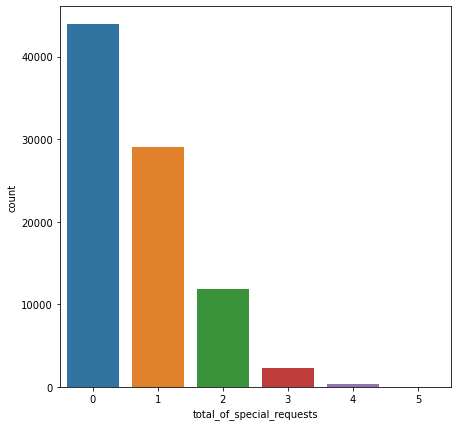

In [99]:
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

#### We see that most number of people do not make any kind of special requests for their bookings. Usually, if any special requests are made, they are limited to 1 or 2 special requests. There are records though which show the number of special requests being as 4 or 5

In [100]:
tbl=pd.crosstab(df.total_of_special_requests,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
total_of_special_requests,,,
0,29311,14571,43882
1,22510,6502,29012
2,9297,2515,11812
3,1920,397,2317
4,286,34,320
5,34,2,36
All,63358,24021,87379


In [101]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']

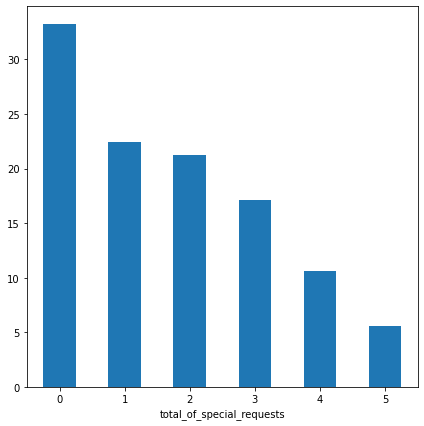

In [102]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=0)
plt.show()

#### From above we see that the more number of special requests a customer makes less likely he is to cancel his booking.

## Conclusion From the Exploratory Data Analysis
* We saw that there was 23% cancellation rate in Resort hotel vs around 30% cancellation rate across City Hotel. This could indicate the presence of overbooking in City Hotel. Management insights need to be taken to identify the cause and steps need to be taken accordingly.
* We observed that bookings with higher estimated lead time, on average, have a higher chance of cancellation. Steps to be extra vigilant towards longer leadt time bookings need to be taken.
* We observed that the cancellation rates have consistently increased with each passing year. There is clearly some kind of customer disatisfaction. Customer feedback could be taken to adress these issues.
* Both the hotels need to focus on the months of July and August, these 2 months have the highest number of bookings out of all months. Discounts and and offers could be given to avoid customers cancelling their bookings in these months.
* We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well.
* Most of the bookings seem to be from European countries. We could focus more on these to reduce the number of cancellations.
* We observed that most of the bookings are made through Online Travel Agents. Contacting said travel agents and setting up contracts between the hotel and these agents could be a very profitable move.
* We also need to dwelve into reasons to check why there are so few repeated guests in the hotels.
* We see that the cancellation percentage of a non-repeated guests is considerably higher compared to a repeated guest. This could indicate a lowern customer statisfaction. Customer feedback is again the best option here.
* More vigilant inspections should be made towards non-refundable deposit types, becaue of the false details given to them for entry visas.
* Transient bookings seem to be the most frequent in number.
* We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings.

In [103]:
# We observed that out of all the features we have one insignificant feature namely, days in waiting list
# So we would drop this variable from our model bulding
df.drop(columns='days_in_waiting_list',inplace=True)

# We also have two post-event columns, reservation_status and reservation_status_date
# To make a robust model we would have to drop these two columns as well
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

# Creating a new feature total_stay
df['total_stay']=df.stays_in_week_nights+df.stays_in_weekend_nights
df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'],inplace=True)

# Creating a new column party_size
df['party_size']=df.adults+df.children+df.babies
df.drop(columns=['adults','children','babies'],inplace=True)

In [104]:
df['is_canceled'] = df['is_canceled'].astype('object')


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87379 entries, 0 to 87378
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87379 non-null  object 
 1   is_canceled                     87379 non-null  object 
 2   lead_time                       87379 non-null  int64  
 3   arrival_date_year               87379 non-null  object 
 4   arrival_date_month              87379 non-null  object 
 5   arrival_date_week_number        87379 non-null  int64  
 6   arrival_date_day_of_month       87379 non-null  int64  
 7   meal                            87379 non-null  object 
 8   country                         87379 non-null  object 
 9   market_segment                  87379 non-null  object 
 10  distribution_channel            87379 non-null  object 
 11  is_repeated_guest               87379 non-null  int64  
 12  previous_cancellations          

In [106]:
df = df.drop('arrival_date_year', axis=1)

In [107]:

df = df.drop('arrival_date_month', axis=1)

In [108]:
df

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,party_size
0,Resort Hotel,0,342,27,1,BB,Europe,Direct,Direct,0,...,3,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
1,Resort Hotel,0,737,27,1,BB,Europe,Direct,Direct,0,...,4,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
2,Resort Hotel,0,7,27,1,BB,Europe,Direct,Direct,0,...,0,No Deposit,No agent,Individuals,Transient,75.00,0,0,1,1.0
3,Resort Hotel,0,13,27,1,BB,Europe,Corporate,Corporate,0,...,0,No Deposit,Agent,Corporate,Transient,75.00,0,0,1,1.0
4,Resort Hotel,0,14,27,1,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,98.00,0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,City Hotel,0,23,35,30,BB,Europe,Offline TA/TO,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,96.14,0,0,7,2.0
87375,City Hotel,0,102,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,225.43,0,2,7,3.0
87376,City Hotel,0,34,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,157.71,0,4,7,2.0
87377,City Hotel,0,109,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,104.40,0,0,7,2.0


In [109]:
categorical_columns = df.select_dtypes(include='object').columns

print(categorical_columns)


Index(['hotel', 'is_canceled', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type'],
      dtype='object')


In [110]:
categorical_columns1 = df[categorical_columns].nunique() >3
categorical_columns1

hotel                   False
is_canceled             False
meal                     True
country                  True
market_segment           True
distribution_channel     True
reserved_room_type       True
assigned_room_type       True
deposit_type            False
agent                   False
company                 False
customer_type            True
dtype: bool

In [111]:
df

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,party_size
0,Resort Hotel,0,342,27,1,BB,Europe,Direct,Direct,0,...,3,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
1,Resort Hotel,0,737,27,1,BB,Europe,Direct,Direct,0,...,4,No Deposit,No agent,Individuals,Transient,0.00,0,0,0,2.0
2,Resort Hotel,0,7,27,1,BB,Europe,Direct,Direct,0,...,0,No Deposit,No agent,Individuals,Transient,75.00,0,0,1,1.0
3,Resort Hotel,0,13,27,1,BB,Europe,Corporate,Corporate,0,...,0,No Deposit,Agent,Corporate,Transient,75.00,0,0,1,1.0
4,Resort Hotel,0,14,27,1,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,98.00,0,1,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,City Hotel,0,23,35,30,BB,Europe,Offline TA/TO,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,96.14,0,0,7,2.0
87375,City Hotel,0,102,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,225.43,0,2,7,3.0
87376,City Hotel,0,34,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,157.71,0,4,7,2.0
87377,City Hotel,0,109,35,31,BB,Europe,Online TA,TA/TO,0,...,0,No Deposit,Agent,Individuals,Transient,104.40,0,0,7,2.0


In [112]:
dummy_columns = ['hotel','meal','country','market_segment','distribution_channel','reserved_room_type',
'assigned_room_type','deposit_type','agent','company','customer_type']

In [113]:
dummy_columns

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type']

In [114]:
df = pd.get_dummies(df, columns=dummy_columns, prefix=dummy_columns)


In [115]:
df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,...,deposit_type_Non Refund,deposit_type_Refundable,agent_Agent,agent_No agent,company_Corporate,company_Individuals,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,27,1,0,0,0,3,0.00,0,...,0,0,0,1,0,1,0,0,1,0
1,0,737,27,1,0,0,0,4,0.00,0,...,0,0,0,1,0,1,0,0,1,0
2,0,7,27,1,0,0,0,0,75.00,0,...,0,0,0,1,0,1,0,0,1,0
3,0,13,27,1,0,0,0,0,75.00,0,...,0,0,1,0,1,0,0,0,1,0
4,0,14,27,1,0,0,0,0,98.00,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,0,23,35,30,0,0,0,0,96.14,0,...,0,0,1,0,0,1,0,0,1,0
87375,0,102,35,31,0,0,0,0,225.43,0,...,0,0,1,0,0,1,0,0,1,0
87376,0,34,35,31,0,0,0,0,157.71,0,...,0,0,1,0,0,1,0,0,1,0
87377,0,109,35,31,0,0,0,0,104.40,0,...,0,0,1,0,0,1,0,0,1,0


In [116]:
numerical_columns = df.select_dtypes(include='int64').columns

print(numerical_columns)


Index(['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests',
       'total_stay'],
      dtype='object')


In [117]:
numerical_columns1 = df.select_dtypes(include='float64').columns

print(numerical_columns1)


Index(['adr', 'party_size'], dtype='object')


In [118]:
num_col= numerical_columns.append(numerical_columns1)

In [119]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)  # 'box-cox' is another available method

# Fit and transform the numerical columns
df[num_col] = pt.fit_transform(df[num_col])


In [120]:
df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,...,deposit_type_Non Refund,deposit_type_Refundable,agent_Agent,agent_No agent,company_Corporate,company_Individuals,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1.828240,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,2.146794,-2.949572,-0.30222,...,0,0,0,1,0,1,0,0,1,0
1,0,2.786562,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,2.147217,-2.949572,-0.30222,...,0,0,0,1,0,1,0,0,1,0
2,0,-0.999758,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.523310,-0.30222,...,0,0,0,1,0,1,0,0,1,0
3,0,-0.721515,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.523310,-0.30222,...,0,0,1,0,1,0,0,0,1,0
4,0,-0.684566,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.059111,-0.30222,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,0,-0.415992,0.622240,1.489635,-0.201673,-0.140225,-0.205635,-0.471645,-0.095007,-0.30222,...,0,0,1,0,0,1,0,0,1,0
87375,0,0.636351,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,1.999277,-0.30222,...,0,0,1,0,0,1,0,0,1,0
87376,0,-0.177495,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,0.984800,-0.30222,...,0,0,1,0,0,1,0,0,1,0
87377,0,0.693032,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,0.062492,-0.30222,...,0,0,1,0,0,1,0,0,1,0


In [121]:
df.dtypes.value_counts()

uint8      61
float64    12
object      1
dtype: int64

In [122]:
# Get columns with data type 'uint8'
uint8_columns = df.select_dtypes(include=['uint8']).columns

# Change data type of selected columns to 'float64'
df[uint8_columns] = df[uint8_columns].astype('float64')


In [123]:
df.dtypes.value_counts()

float64    73
object      1
dtype: int64

In [124]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Select the numerical columns to scale
num_data = df[num_col]

# Apply Min-Max Scaling or Standardization to numerical columns
scaler = MinMaxScaler()  # we can also use StandardScaler if we prefer Z-score scaling
num_scaled = scaler.fit_transform(num_data)

# Create a DataFrame with scaled numerical columns and non-scaled categorical columns
scaled_df = pd.DataFrame(num_scaled, columns=num_col)
scaled_df = pd.concat([scaled_df, df.drop(columns=num_col)], axis=1)


In [125]:
df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,...,deposit_type_Non Refund,deposit_type_Refundable,agent_Agent,agent_No agent,company_Corporate,company_Individuals,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,1.828240,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,2.146794,-2.949572,-0.30222,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,2.786562,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,2.147217,-2.949572,-0.30222,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,-0.999758,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.523310,-0.30222,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,-0.721515,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.523310,-0.30222,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.684566,0.069996,-1.890700,-0.201673,-0.140225,-0.205635,-0.471645,-0.059111,-0.30222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87374,0,-0.415992,0.622240,1.489635,-0.201673,-0.140225,-0.205635,-0.471645,-0.095007,-0.30222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87375,0,0.636351,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,1.999277,-0.30222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87376,0,-0.177495,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,0.984800,-0.30222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87377,0,0.693032,0.622240,1.581528,-0.201673,-0.140225,-0.205635,-0.471645,0.062492,-0.30222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [126]:
# Change data type of selected columns to 'float64'
df['is_canceled'] = df['is_canceled'].astype('int')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.8004119935912108
Precision: 0.6746987951807228
Recall: 0.49091297840496045
F1 Score: 0.5683168316831684


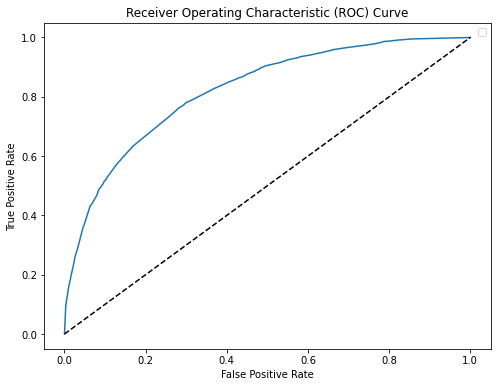

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Separate features and target variable
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree model

decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)


# Predict on the test set

previsoes = decision_tree.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, previsoes)
precision = precision_score(y_test, previsoes)
recall = recall_score(y_test, previsoes)
f1 = f1_score(y_test, previsoes)
roc_auc = roc_auc_score(y_test, previsoes)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


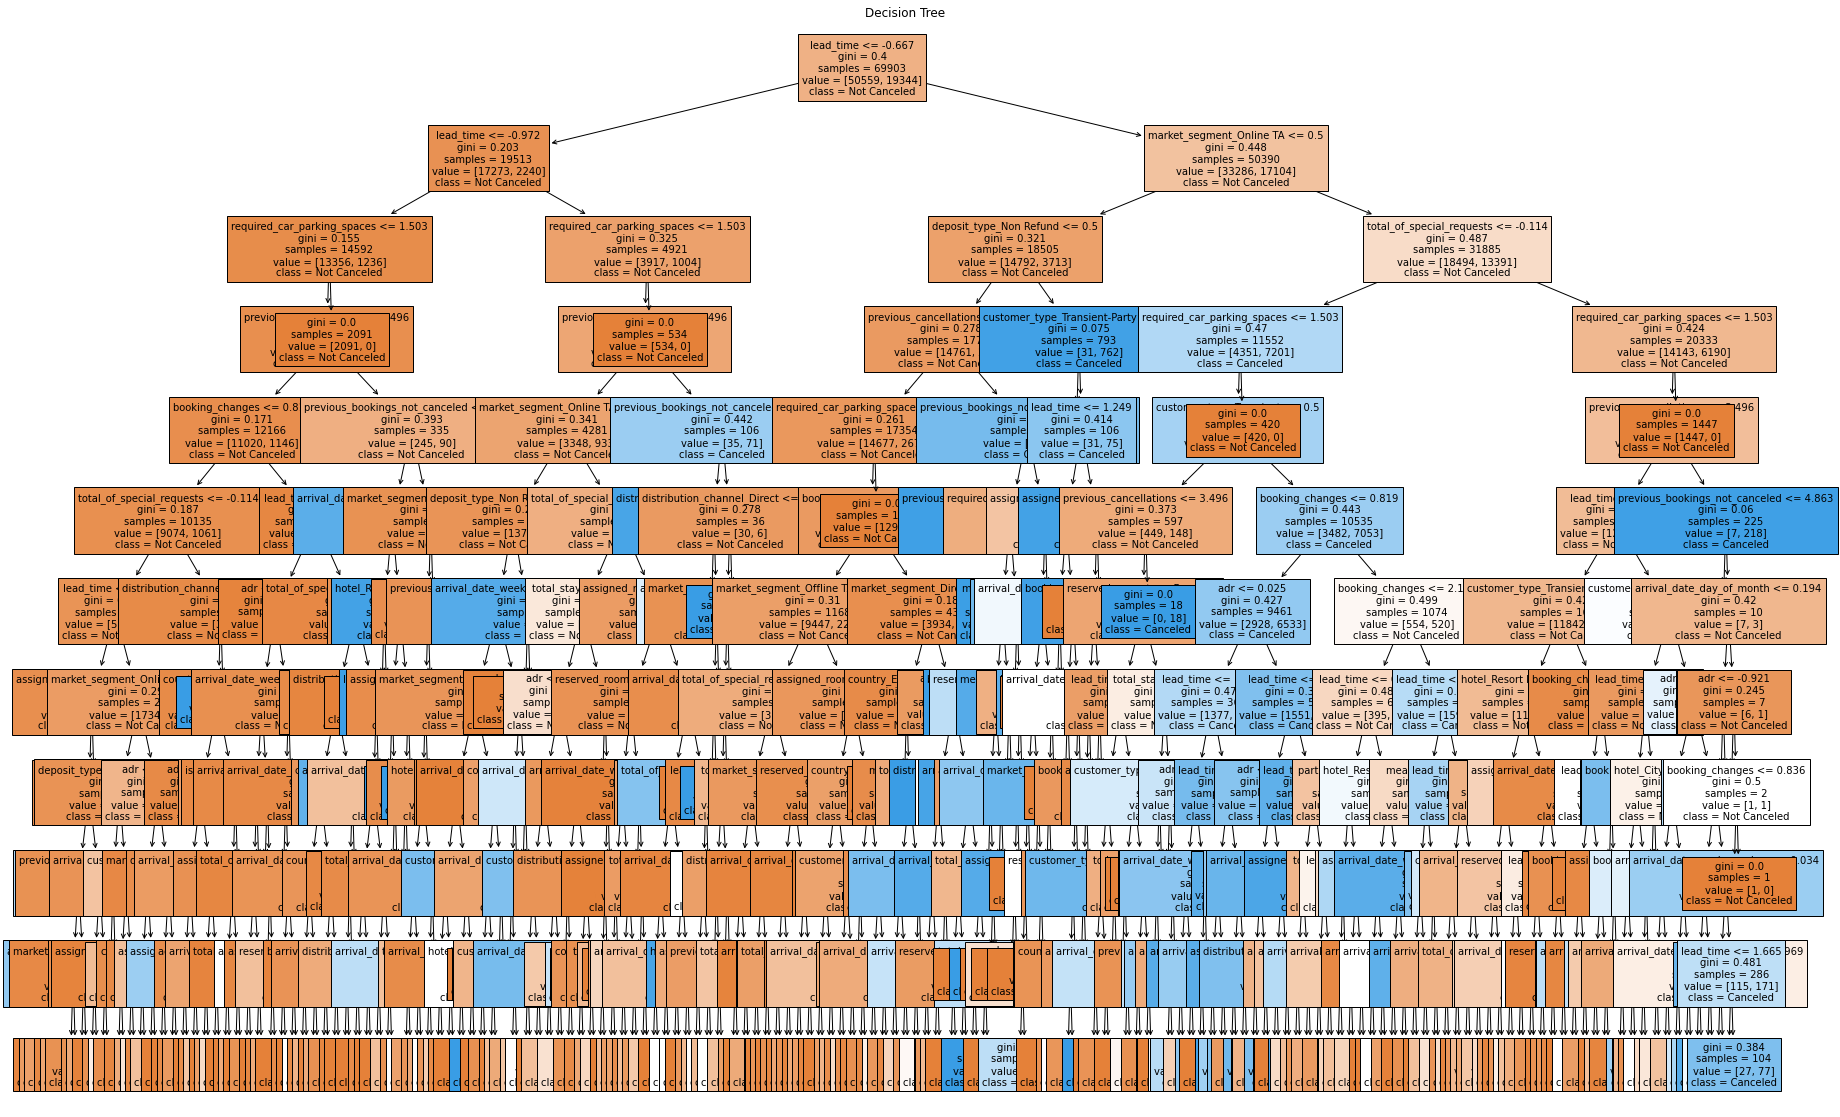

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(30, 20))  # You can adjust the figure size as needed
plot_tree(decision_tree, feature_names=X.columns, class_names=["Not Canceled", "Canceled"], filled=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


Accuracy: The model achieved an accuracy of approximately 80.04%. This metric measures the overall proportion of correct predictions in the test set.

Precision: The precision was around 67.46%. Precision represents the ratio of true positive predictions to all positive predictions made by the model. It indicates the reliability of positive predictions made by the model.

Recall: The recall value was approximately 49.09%. Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that were correctly predicted by the model. It reflects the model's ability to capture positive cases.

F1 Score: The F1 score reached about 56.83%. The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of a model's accuracy considering both false positives and false negatives.

ROC AUC: The ROC AUC score was approximately 82.02%. The Receiver Operating Characteristic (ROC) curve visualizes the trade-off between the true positive rate and the false positive rate at various thresholds. The Area Under the ROC Curve (AUC) is a single value summarizing the overall performance of the model in distinguishing between positive and negative classes.